In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm.notebook
from IPython.display import set_matplotlib_formats
from loaders import load_selected_attributes, load_thumbnail

tqdm.notebook.tqdm().pandas()

%matplotlib inline
set_matplotlib_formats('png')
sns.set(rc={'axes.labelcolor':'white'})

In [2]:
vids = load_selected_attributes()
vids

,category_id,description__ant,description__avail,description__deal,description__follow,description__game,description__imag,description__key,description__life,description__music,...,title__shoot,title__tech,title__trailer,title__video,title__world,title_num_exclamation_marks,title_num_numbers,title_num_periods,title_num_question_marks,title_num_uppercase_words
0,NaN,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,NaN,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,NaN,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8603,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4
8604,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8605,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
vids['category_id'].isnull().value_counts()

True     8212
False     395
Name: category_id, dtype: int64

category labeled: 395
not labeled: 8212
labeled to not labeled ratio 4.59 %

Category per labeled video:


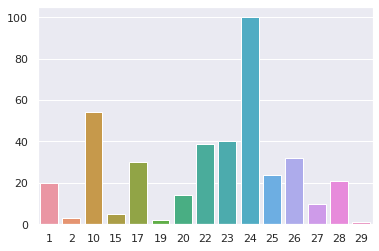

In [9]:
all_vids = vids
labeled_vids = vids[~pd.isnull(vids['category_id'])]

labeled_count = len(labeled_vids.index)
notlabeled_count = len(all_vids.index) - len(labeled_vids.index)

print('category labeled:', labeled_count)
print('not labeled:', notlabeled_count)
print('labeled to not labeled ratio', round(labeled_count / len(vids.index) * 100, 2), '%')
print()
print('Category per labeled video:')

labeled_count = labeled_vids['category_id'].value_counts()
sns.barplot(labeled_count.index.astype('int'), labeled_count.values)

In [63]:
from scipy.stats import chisquare

def compare_counts(count):
    expected_normalized = (labeled_count / labeled_count.sum())
    expected = count.sum() * expected_normalized

    expected_observed = [
        (
            expected[int(key)],
            count[key] if key in count else 0
        )
        for key in labeled_count.keys()
    ]
    n_categories = len(labeled_count)
    expected, observed = zip(*expected_observed)
    return chisquare(observed, expected)

# Label Spreading

In [5]:
all_vids['has_image'] = all_vids['has_image'].astype(int)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("Null data before replacing:")
        print(all_vids.isnull().sum())
#     print(all_vids.loc[all_vids['description_num_chars']/.isnull()])
#     print(X_train_with_and_without_categories['like_ratio'])

X_train_with_and_without_categories = all_vids[all_vids.columns.difference(['category_id'], sort=False)].copy()
Y_train_with_and_without_categories = all_vids['category_id'].copy()

# Replace NaN for X data
# like_ratio == NaN if ratings are disabled. Using 1.0 instead.
X_train_with_and_without_categories['like_ratio'] = X_train_with_and_without_categories['like_ratio'].replace({np.nan: 1})
# description_num == NaN if there is no description. Using 0 instead.
X_train_with_and_without_categories = X_train_with_and_without_categories.replace({np.nan: 0})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("Count of null data after replacing:")
        print(X_train_with_and_without_categories.isnull().sum().sum())

# Replace NaN with -1.0 for Y data
print("Original Y values:")
print(Y_train_with_and_without_categories.value_counts(dropna=False))
Y_train_with_and_without_categories = Y_train_with_and_without_categories.replace({np.nan: -1})
Y_train_with_and_without_categories.value_counts()


Null data before replacing:
category_id                          8212
description__ant                        0
description__avail                      0
description__deal                       0
description__follow                     0
description__game                       0
description__imag                       0
description__key                        0
description__life                       0
description__music                      0
description__new                        0
description__news                       0
description__nhttp                      0
description__noggin                     0
description__show                       0
description__tag                        0
description__time                       0
description__watch                      0
description__world                      0
description__youtub                     0
description_num_chars                 150
description_num_exclamation_marks     150
description_num_numbers               150
descri

-1.0     8212
 24.0     100
 10.0      54
 23.0      40
 22.0      39
 26.0      32
 17.0      30
 25.0      24
 28.0      21
 1.0       20
 20.0      14
 27.0      10
 15.0       5
 2.0        3
 19.0       2
 29.0       1
Name: category_id, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, normalize, scale, Normalizer

X = normalize(X_train_with_and_without_categories, norm='l1', axis=0, copy=True)
# I love Python
Y_train_with_and_without_categories = [int(float(x)) for x in Y_train_with_and_without_categories]
X

array([[0.00038775, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00215983,
        0.00014588],
       [0.        , 0.00164474, 0.        , ..., 0.00071124, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00014588],
       [0.00038775, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00038775, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
neighbors_values = [5, 7, 9, 11, 13, 15, 17, 19]

/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


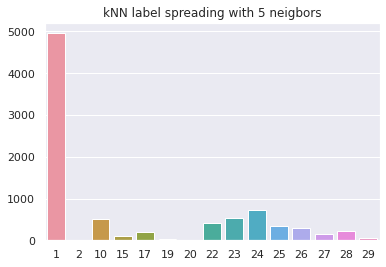

Power_divergenceResult(statistic=49723.135340181485, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


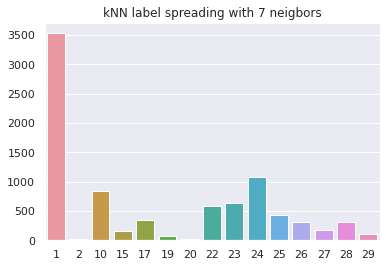

Power_divergenceResult(statistic=23745.827012662416, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


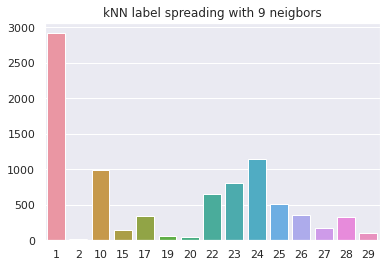

Power_divergenceResult(statistic=15615.928253846963, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


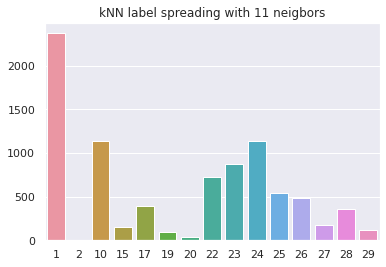

Power_divergenceResult(statistic=10080.700764535808, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


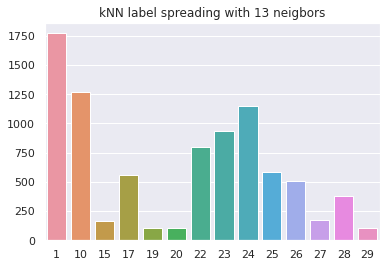

Power_divergenceResult(statistic=5344.393609668913, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


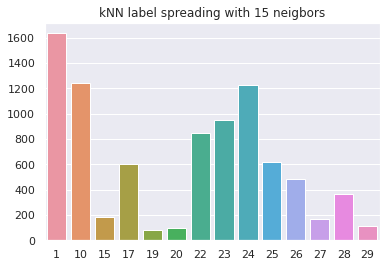

Power_divergenceResult(statistic=4523.844497899009, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


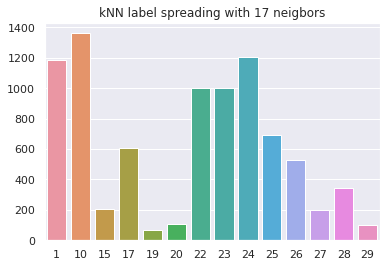

Power_divergenceResult(statistic=2518.1065534202935, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


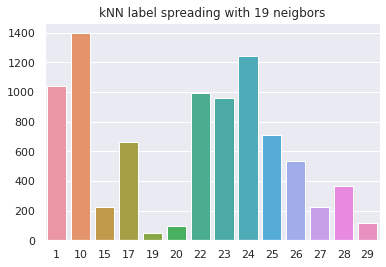

Power_divergenceResult(statistic=2155.560151586491, pvalue=0.0)


In [65]:
from sklearn.semi_supervised import LabelSpreading

for n_neighbors in neighbors_values:
    model = LabelSpreading('knn', n_neighbors=n_neighbors, max_iter=100)
    model.fit(X, Y_train_with_and_without_categories)

    knn_predicted = model.predict(X)
    count = pd.Series(knn_predicted).value_counts()
    
    plt.title(f"kNN label spreading with {n_neighbors} neigbors")
    sns.barplot(count.index.astype('int'), count.values)
    plt.show()
    print(compare_counts(count))

In [70]:
gamma_values = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]

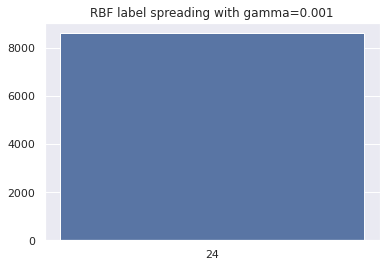

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


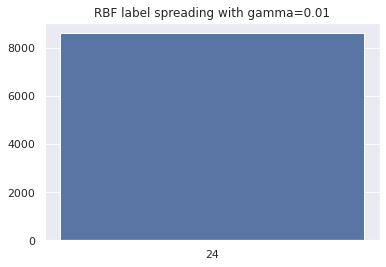

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


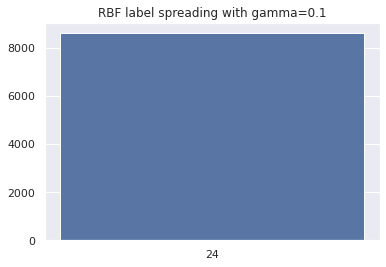

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


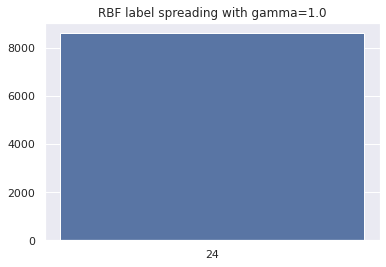

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


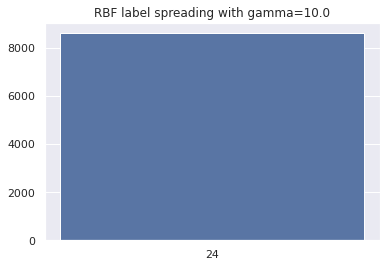

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


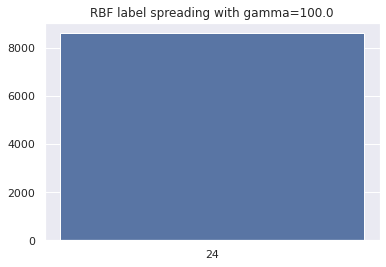

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


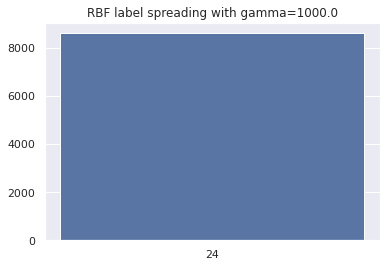

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


In [66]:
for gamma in gamma_values:
    model = LabelSpreading('rbf', gamma=gamma, max_iter=100)
    model.fit(X, Y_train_with_and_without_categories)

    rfb_predicted = model.predict(X)
    count = pd.Series(rfb_predicted).value_counts()
    plt.title(f"RBF label spreading with gamma={gamma}")
    sns.barplot(count.index.astype('int'), count.values)
    plt.show()
    print(compare_counts(count))

# Label propagation

/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


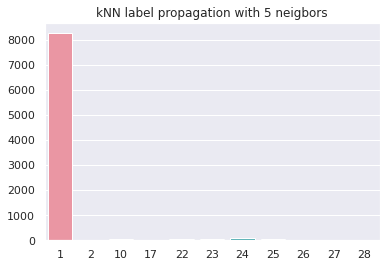

Power_divergenceResult(statistic=147816.8024252826, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


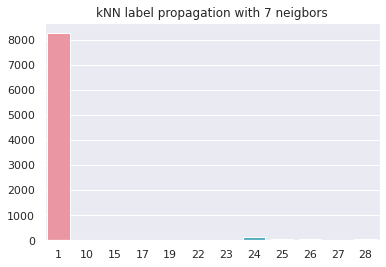

Power_divergenceResult(statistic=147709.9107629276, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


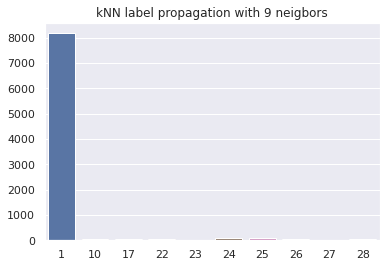

Power_divergenceResult(statistic=145004.05324258757, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


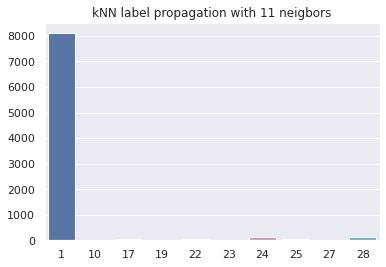

Power_divergenceResult(statistic=142229.3845578539, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


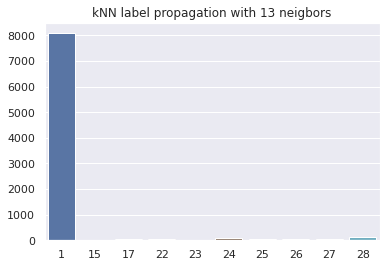

Power_divergenceResult(statistic=141316.4985081782, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


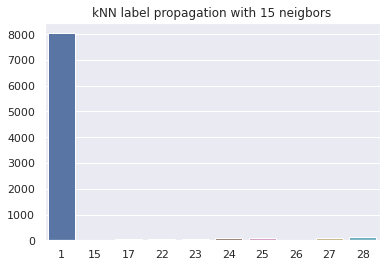

Power_divergenceResult(statistic=139708.72237862172, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


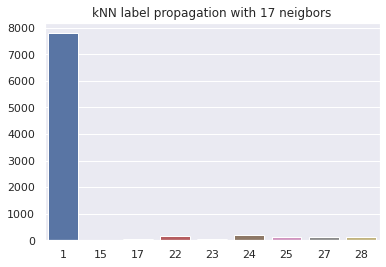

Power_divergenceResult(statistic=130879.57018495038, pvalue=0.0)


/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=100 was reached without convergence.
  category=ConvergenceWarning


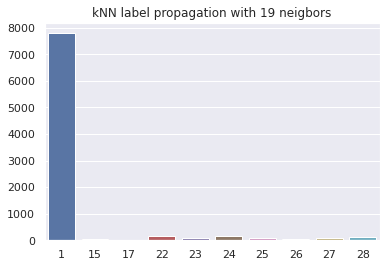

Power_divergenceResult(statistic=130867.16893688998, pvalue=0.0)


In [68]:
from sklearn.semi_supervised import LabelPropagation

for n_neighbors in neighbors_values:
    model = LabelPropagation('knn', n_neighbors=n_neighbors, max_iter=100)
    model.fit(X, Y_train_with_and_without_categories)

    knn_predicted = model.predict(X)
    count = pd.Series(knn_predicted).value_counts()
    plt.title(f"kNN label propagation with {n_neighbors} neigbors")
    sns.barplot(count.index.astype('int'), count.values)
    plt.show()
    print(compare_counts(count))

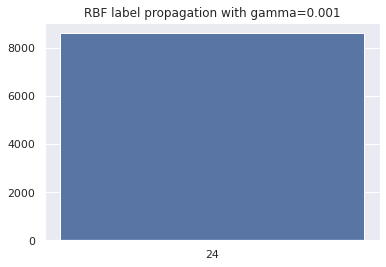

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


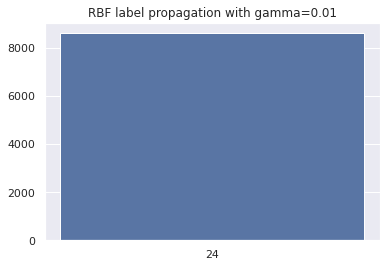

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


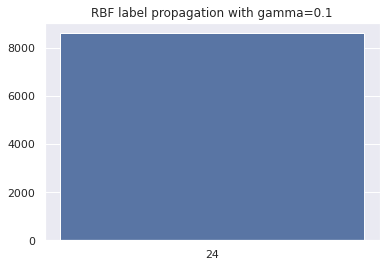

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


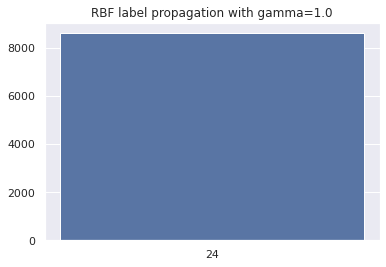

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


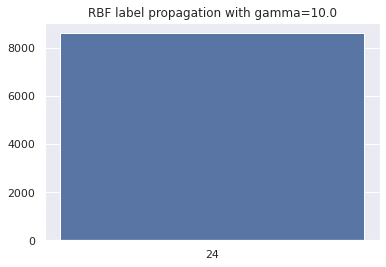

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


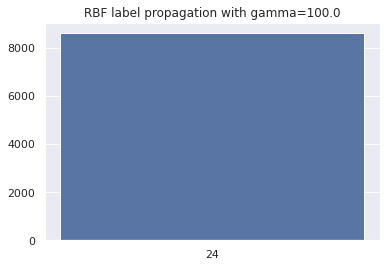

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


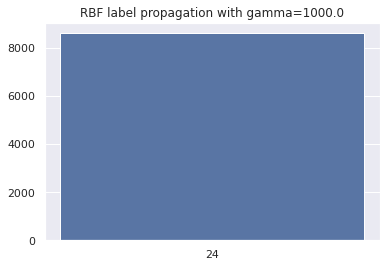

Power_divergenceResult(statistic=25390.65, pvalue=0.0)


In [71]:
for gamma in gamma_values:
    model = LabelPropagation('rbf', gamma=gamma, max_iter=100)
    model.fit(X, Y_train_with_and_without_categories)

    knn_predicted = model.predict(X)
    count = pd.Series(knn_predicted).value_counts()
    plt.title(f"RBF label propagation with gamma={gamma}")
    sns.barplot(count.index.astype('int'), count.values)
    plt.show()
    print(compare_counts(count))